In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Create dataframes for all the year files in world happiness report folder

In [113]:
#df_2015 = pd.read_csv("world-happiness-report/2015.csv", low_memory=False)
#df_2015["Health (Life Expectancy)"] = 100 * df_2015["Health (Life Expectancy)"]
#df_2015.info()
#df_2015.head()
#df_2015 = df_2015.assign(Perceptions=1-df_2015["Trust (Government Corruption)"])
#df_2015.head()
#df.drop('Trust (Government Corruption)', axis=1, inplace=True)
#df_2015.head()
#df_2015.to_csv("world-happiness-report/2015.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     158 non-null    int64  
 1   Country                        158 non-null    object 
 2   Region                         158 non-null    object 
 3   Happiness Score                158 non-null    float64
 4   Happiness Rank                 158 non-null    int64  
 5   GDP per Capita                 158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom to make life choices   158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Perceptions                    158 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 12.5+ KB


In [114]:
df_2015 = pd.read_csv("world-happiness-report/2015.csv", low_memory=False)
df_2015.info()
df_2015.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       158 non-null    object 
 1   Region                        158 non-null    object 
 2   Happiness Score               158 non-null    float64
 3   Happiness Rank                158 non-null    int64  
 4   GDP per Capita                158 non-null    float64
 5   Healthy life expectancy       158 non-null    float64
 6   Freedom to make life choices  158 non-null    float64
 7   Perception of corruption      158 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 10.0+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,Southern Asia,3.575,153,0.31982,30.335,0.23414,0.90281
1,Albania,Central and Eastern Europe,4.959,95,0.87867,81.325,0.35733,0.93587
2,Algeria,Middle East and Northern Africa,5.605,68,0.93929,61.766,0.28579,0.82617
3,Angola,Sub-Saharan Africa,4.033,137,0.75778,16.683,0.10384,0.92878
4,Argentina,Latin America and Caribbean,6.574,30,1.05351,78.723,0.44974,0.91516


In [115]:
df_2016 = pd.read_csv("world-happiness-report/2016.csv", low_memory=False)
df_2016.info()
df_2016.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       157 non-null    object 
 1   Region                        157 non-null    object 
 2   Happiness Score               157 non-null    float64
 3   Happiness Rank                157 non-null    int64  
 4   GDP per Capita                157 non-null    float64
 5   Healthy life expectancy       157 non-null    float64
 6   Freedom to make life choices  157 non-null    float64
 7   Perception of corruption      157 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,Southern Asia,3.360,154,0.38227,17.344,0.16430,0.92888
1,Albania,Central and Eastern Europe,4.655,109,0.95530,73.007,0.31866,0.94699
2,Algeria,Middle East and Northern Africa,6.355,38,1.05266,61.804,0.21006,0.83843
3,Angola,Sub-Saharan Africa,3.866,141,0.84731,4.991,0.00589,0.91566
4,Argentina,Latin America and Caribbean,6.650,26,1.15137,69.711,0.42284,0.92704


In [116]:
df_2017 = pd.read_csv("world-happiness-report/2017.csv", low_memory=False)
df_2017.info()
df_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       155 non-null    object 
 1   Region                        149 non-null    object 
 2   Happiness Score               155 non-null    float64
 3   Happiness Rank                155 non-null    int64  
 4   GDP per Capita                155 non-null    float64
 5   Healthy life expectancy       155 non-null    float64
 6   Freedom to make life choices  155 non-null    float64
 7   Perception of corruption      155 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.8+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,Southern Asia,3.794,141,0.401477,18.074678,0.106180,0.938842
1,Albania,Central and Eastern Europe,4.644,109,0.996193,73.115975,0.381499,0.960136
2,Algeria,Middle East and Northern Africa,5.872,53,1.091864,61.758465,0.233336,0.853904
3,Angola,Sub-Saharan Africa,3.795,140,0.858428,4.986867,0.000000,0.930280
4,Argentina,Latin America and Caribbean,6.599,24,1.185295,69.513708,0.494519,0.940260


In [117]:
df_2018 = pd.read_csv("world-happiness-report/2018.csv", low_memory=False)
df_2018.info()
df_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Region                        151 non-null    object 
 2   Happiness Score               156 non-null    float64
 3   Happiness Rank                156 non-null    int64  
 4   GDP per Capita                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Perception of corruption      155 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,Southern Asia,3.632,145,0.332,0.255,0.085,0.036
1,Albania,Central and Eastern Europe,4.586,112,0.916,0.790,0.419,0.032
2,Algeria,Middle East and Northern Africa,5.295,84,0.979,0.687,0.077,0.135
3,Angola,Sub-Saharan Africa,3.795,142,0.730,0.269,0.000,0.061
4,Argentina,Latin America and Caribbean,6.388,29,1.073,0.744,0.570,0.054


In [118]:
df_2019 = pd.read_csv("world-happiness-report/2019.csv", low_memory=False)
df_2019.info()
df_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       156 non-null    object 
 1   Region                        150 non-null    object 
 2   Happiness Score               156 non-null    float64
 3   Happiness Rank                156 non-null    int64  
 4   GDP per Capita                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Perception of corruption      156 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.9+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,Southern Asia,3.203,154,0.350,0.361,0.000,0.025
1,Albania,Central and Eastern Europe,4.719,107,0.947,0.874,0.383,0.027
2,Algeria,Middle East and Northern Africa,5.211,88,1.002,0.785,0.086,0.114
3,Argentina,Latin America and Caribbean,6.086,47,1.092,0.881,0.471,0.050
4,Armenia,Central and Eastern Europe,4.559,116,0.850,0.815,0.283,0.064


In [119]:
df_2020 = pd.read_csv("world-happiness-report/2020.csv", low_memory=False)
df_2020.info()
df_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       153 non-null    object 
 1   Region                        153 non-null    object 
 2   Happiness Score               153 non-null    float64
 3   Happiness Rank                153 non-null    int64  
 4   GDP per Capita                153 non-null    float64
 5   Healthy life expectancy       153 non-null    float64
 6   Freedom to make life choices  153 non-null    float64
 7   Perception of corruption      153 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.7+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,South Asia,2.5669,153,0.300706,52.590000,0.396573,0.933687
1,Albania,Central and Eastern Europe,4.8827,105,0.906653,68.708138,0.781994,0.896304
2,Algeria,Middle East and North Africa,5.0051,100,0.943856,65.905174,0.466611,0.735485
3,Argentina,Latin America and Caribbean,5.9747,55,1.028466,68.803802,0.831132,0.842010
4,Armenia,Commonwealth of Independent States,4.6768,116,0.808262,66.750656,0.712018,0.773545


In [120]:
df_2021 = pd.read_csv("world-happiness-report/2021.csv", low_memory=False)
df_2021.info()
df_2021.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       149 non-null    object 
 1   Region                        149 non-null    object 
 2   Happiness Score               149 non-null    float64
 3   Happiness Rank                149 non-null    int64  
 4   GDP per Capita                149 non-null    float64
 5   Healthy life expectancy       149 non-null    float64
 6   Freedom to make life choices  149 non-null    float64
 7   Perception of corruption      149 non-null    float64
dtypes: float64(5), int64(1), object(2)
memory usage: 9.4+ KB


,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption
0,Afghanistan,South Asia,2.523,149,0.370,52.493,0.382,0.924
1,Albania,Central and Eastern Europe,5.117,93,1.008,68.999,0.785,0.901
2,Algeria,Middle East and North Africa,4.887,109,0.946,66.005,0.480,0.752
3,Argentina,Latin America and Caribbean,5.929,57,1.162,69.000,0.828,0.834
4,Armenia,Commonwealth of Independent States,5.283,86,0.996,67.055,0.825,0.629


In [137]:
df_2015 = df_2015.assign(Year=2015)
df_2016 = df_2016.assign(Year=2016)
df_2017 = df_2017.assign(Year=2017)
df_2018 = df_2018.assign(Year=2018)
df_2019 = df_2019.assign(Year=2019)
df_2020 = df_2020.assign(Year=2020)
df_2021 = df_2021.assign(Year=2021)
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]
df = pd.concat(dfs, ignore_index=True)

In [138]:
#df = pd.read_csv("world-happiness-report/integrated_report.csv", low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084 entries, 0 to 1083
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       1084 non-null   object 
 1   Region                        1067 non-null   object 
 2   Happiness Score               1084 non-null   float64
 3   Happiness Rank                1084 non-null   int64  
 4   GDP per Capita                1084 non-null   float64
 5   Healthy life expectancy       1084 non-null   float64
 6   Freedom to make life choices  1084 non-null   float64
 7   Perception of corruption      1083 non-null   float64
 8   Year                          1084 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 76.3+ KB


In [123]:
df.head()

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption,Year
0,Afghanistan,Southern Asia,3.575,153,0.31982,30.335,0.23414,0.90281,2015
1,Albania,Central and Eastern Europe,4.959,95,0.87867,81.325,0.35733,0.93587,2015
2,Algeria,Middle East and Northern Africa,5.605,68,0.93929,61.766,0.28579,0.82617,2015
3,Angola,Sub-Saharan Africa,4.033,137,0.75778,16.683,0.10384,0.92878,2015
4,Argentina,Latin America and Caribbean,6.574,30,1.05351,78.723,0.44974,0.91516,2015


In [124]:
df.tail()

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption,Year
1079,Venezuela,Latin America and Caribbean,4.892,107,0.852,66.700,0.615,0.827,2021
1080,Vietnam,Southeast Asia,5.411,79,0.817,68.034,0.940,0.796,2021
1081,Yemen,Middle East and North Africa,3.658,141,0.329,57.122,0.602,0.800,2021
1082,Zambia,Sub-Saharan Africa,4.073,137,0.528,55.809,0.782,0.823,2021
1083,Zimbabwe,Sub-Saharan Africa,3.145,148,0.457,56.201,0.677,0.821,2021


In [139]:
dataset_mexico = df[df["Country"] == "Mexico"]

In [140]:
dataset_mexico.sort_values(by="Year", ascending=False).head(8)

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption,Year
1022,Mexico,Latin America and Caribbean,6.317,36,1.126000,68.597000,0.862000,0.799000,2021
872,Mexico,Latin America and Caribbean,6.465,24,1.024387,68.299026,0.858709,0.806822,2020
715,Mexico,Latin America and Caribbean,6.595,23,1.070000,0.861000,0.433000,0.073000,2019
560,Mexico,Latin America and Caribbean,6.488,24,1.038000,0.761000,0.479000,0.095000,2018
404,Mexico,Latin America and Caribbean,6.578,25,1.153184,70.997900,0.412730,0.867226,2017
247,Mexico,Latin America and Caribbean,6.778,21,1.115080,71.143000,0.377090,0.816450,2016
91,Mexico,Latin America and Caribbean,7.187,14,1.020540,81.444000,0.481810,0.786880,2015


In [141]:
dataset_usa = df[df["Country"] == "United States"]
dataset_usa.sort_values(by="Year", ascending=False).head(8)
#Explicación diferencia de expectativa de vida a partir de 2020

,Country,Region,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption,Year
1076,United States,North America and ANZ,6.9510,19,1.533000,68.200000,0.837000,0.698000,2021
927,United States,North America and ANZ,6.9396,18,1.373987,68.299500,0.842620,0.699715,2020
774,United States,North America,6.8920,19,1.433000,0.874000,0.454000,0.128000,2019
618,United States,North America,6.8860,18,1.398000,0.819000,0.547000,0.133000,2018
462,United States,North America,6.9930,14,1.546259,77.428663,0.505741,0.864361,2017
307,United States,North America,7.1040,13,1.507960,77.900000,0.481630,0.851320,2016
150,United States,North America,7.1190,15,1.394510,86.179000,0.546040,0.841100,2015


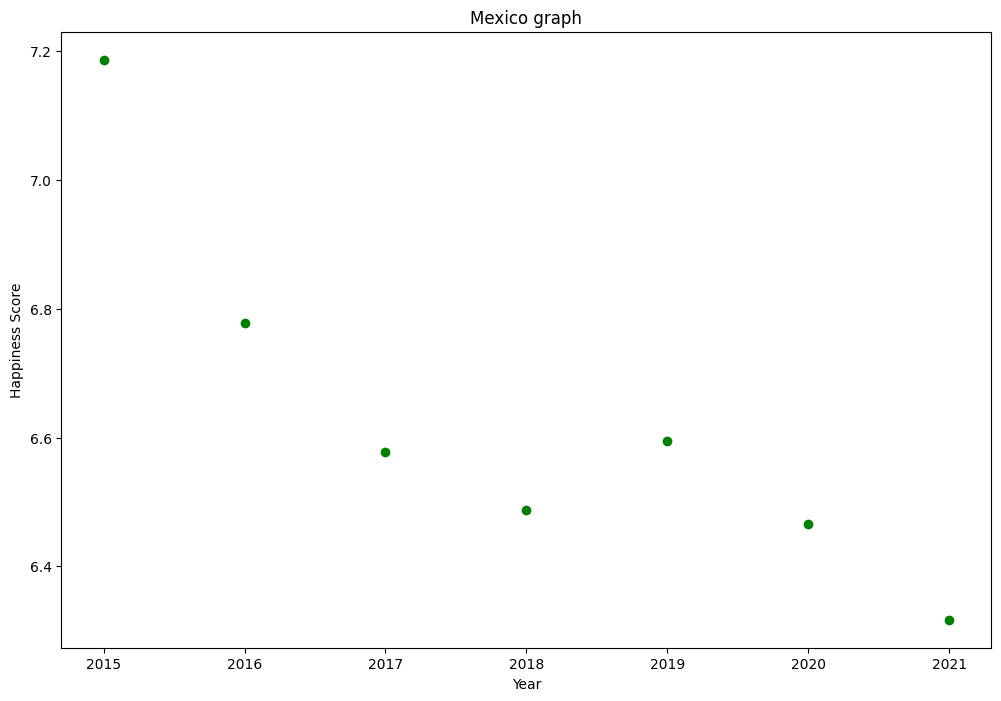

In [142]:
plt.figure(figsize=(12, 8))
plt.title("Mexico graph")
plt.xlabel("Year")
plt.ylabel("Happiness Score")

plt.scatter(
    dataset_mexico["Year"].astype(int),
    dataset_mexico["Happiness Score"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["Year"], dataset_mexico["Year"])
plt.show()

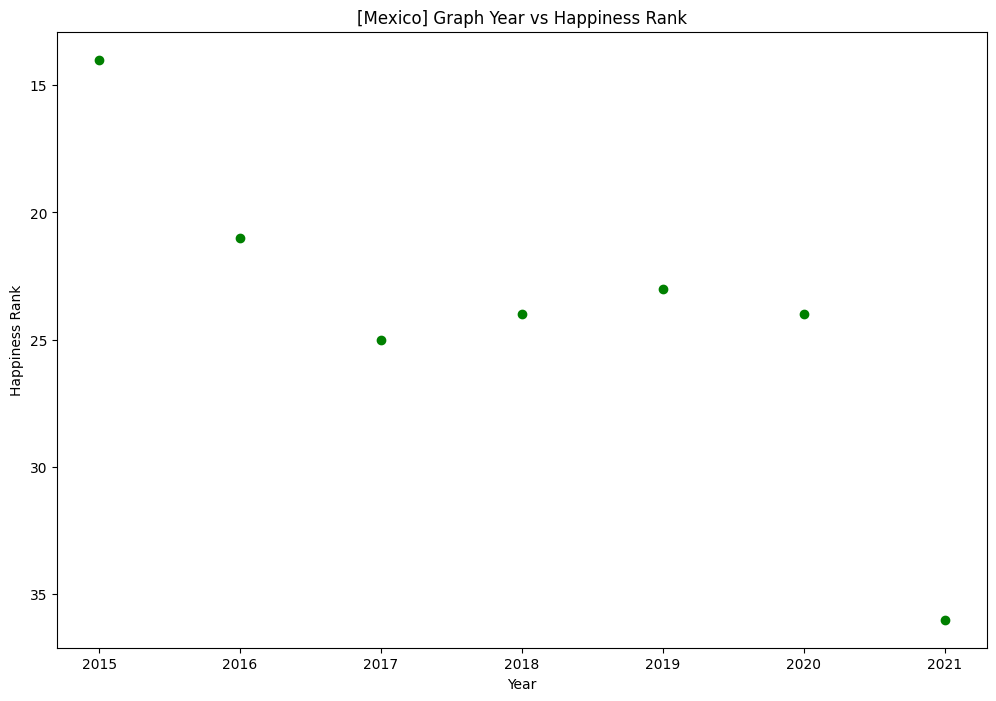

In [136]:
plt.figure(figsize=(12, 8))
plt.title("[Mexico] Graph Year vs Happiness Rank")
plt.xlabel("Year")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_mexico["Year"].astype(int),
    dataset_mexico["Happiness Rank"],
    marker='o',
    color="green",
)
plt.gca().invert_yaxis()
plt.xticks(dataset_mexico["Year"], dataset_mexico["Year"])
plt.show()

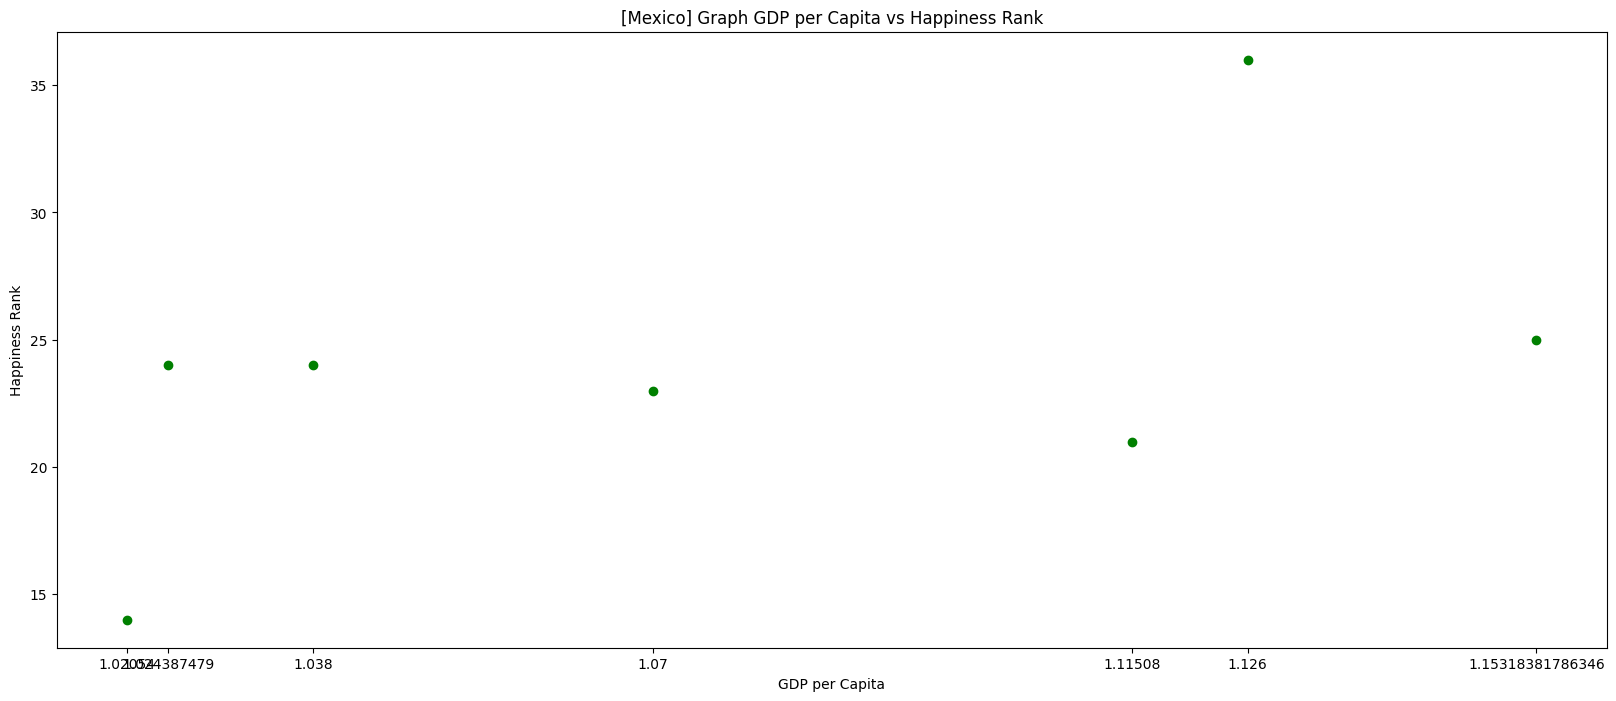

In [131]:
plt.figure(figsize=(20, 8))
plt.title("[Mexico] Graph GDP per Capita vs Happiness Rank")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_mexico["GDP per Capita"],
    dataset_mexico["Happiness Rank"],
    marker='o',
    color="green",
)
plt.xticks(dataset_mexico["GDP per Capita"], dataset_mexico["GDP per Capita"])
plt.show()

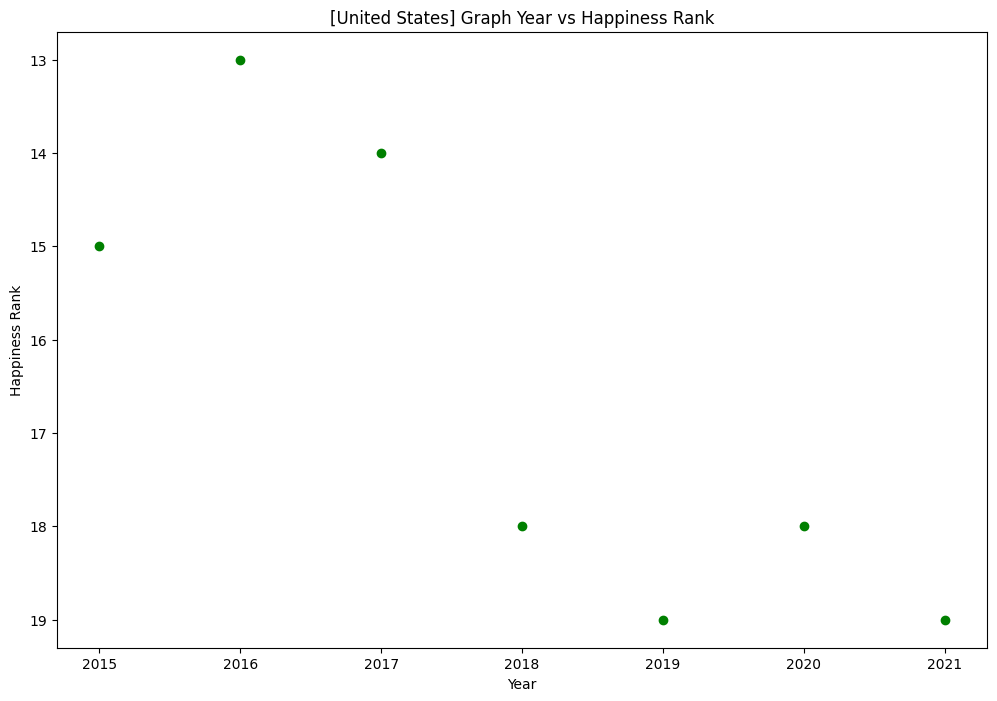

In [144]:
plt.figure(figsize=(12, 8))
plt.title("[United States] Graph Year vs Happiness Rank")
plt.xlabel("Year")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_usa["Year"].astype(int),
    dataset_usa["Happiness Rank"],
    marker='o',
    color="green",
)
plt.gca().invert_yaxis()
plt.xticks(dataset_usa["Year"], dataset_usa["Year"])
plt.show()

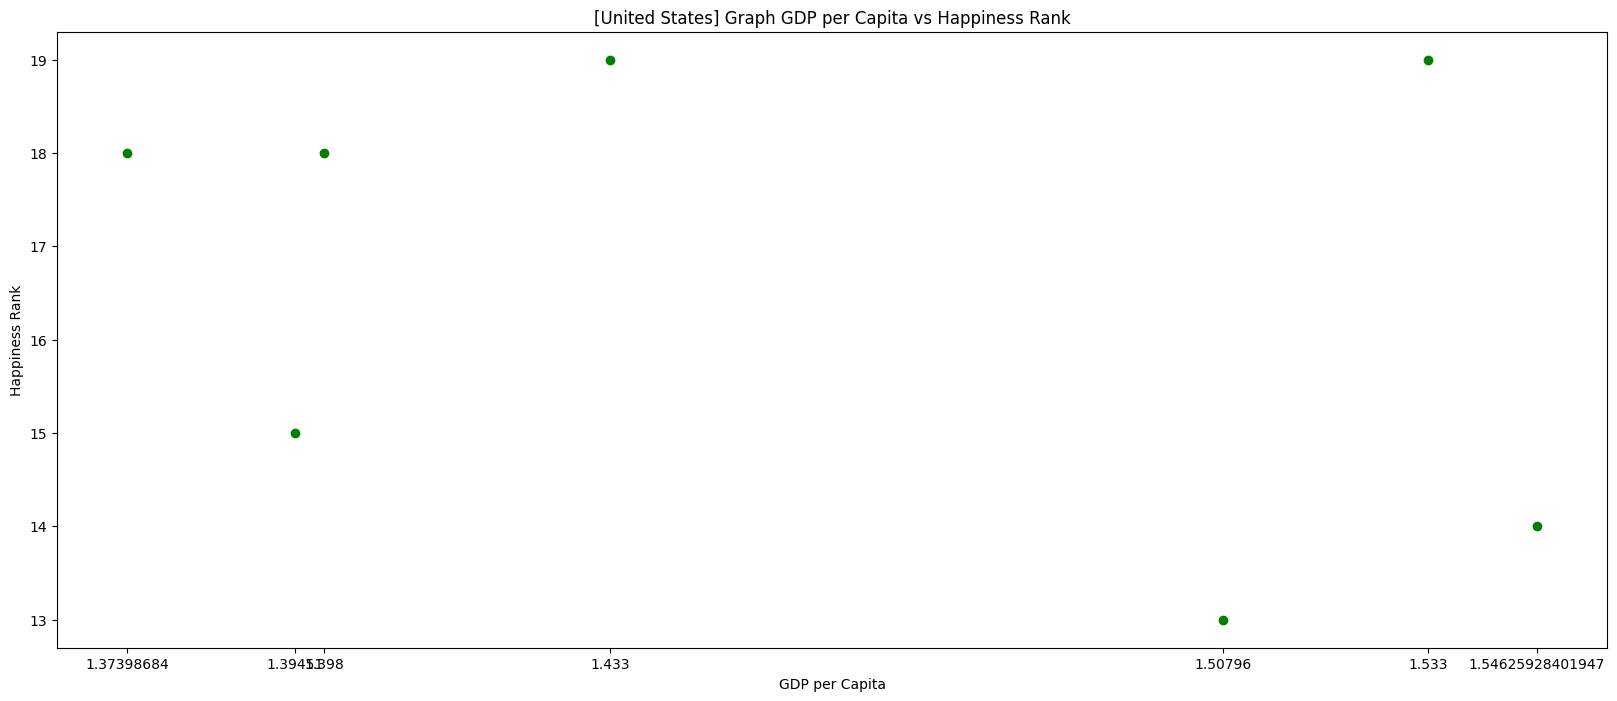

In [143]:
plt.figure(figsize=(20, 8))
plt.title("[United States] Graph GDP per Capita vs Happiness Rank")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Rank")

plt.scatter(
    dataset_usa["GDP per Capita"],
    dataset_usa["Happiness Rank"],
    marker='o',
    color="green",
)
plt.xticks(dataset_usa["GDP per Capita"], dataset_usa["GDP per Capita"])
plt.show()

In [ ]:
# Correlation Matrix

In [149]:
corr_matrix = df.corr()
corr_matrix

,Happiness Score,Happiness Rank,GDP per Capita,Healthy life expectancy,Freedom to make life choices,Perception of corruption,Year
Happiness Score,1.000000,-0.989891,0.785453,0.311069,0.399134,-0.079287,0.044499
Happiness Rank,-0.989891,1.000000,-0.791175,-0.304787,-0.374874,0.075730,-0.026736
GDP per Capita,0.785453,-0.791175,1.000000,0.345159,0.236604,-0.033498,0.025062
Healthy life expectancy,0.311069,-0.304787,0.345159,1.000000,0.384111,0.729223,-0.081152
Freedom to make life choices,0.399134,-0.374874,0.236604,0.384111,1.000000,0.074841,0.604426
Perception of corruption,-0.079287,0.075730,-0.033498,0.729223,0.074841,1.000000,-0.300293
Year,0.044499,-0.026736,0.025062,-0.081152,0.604426,-0.300293,1.000000


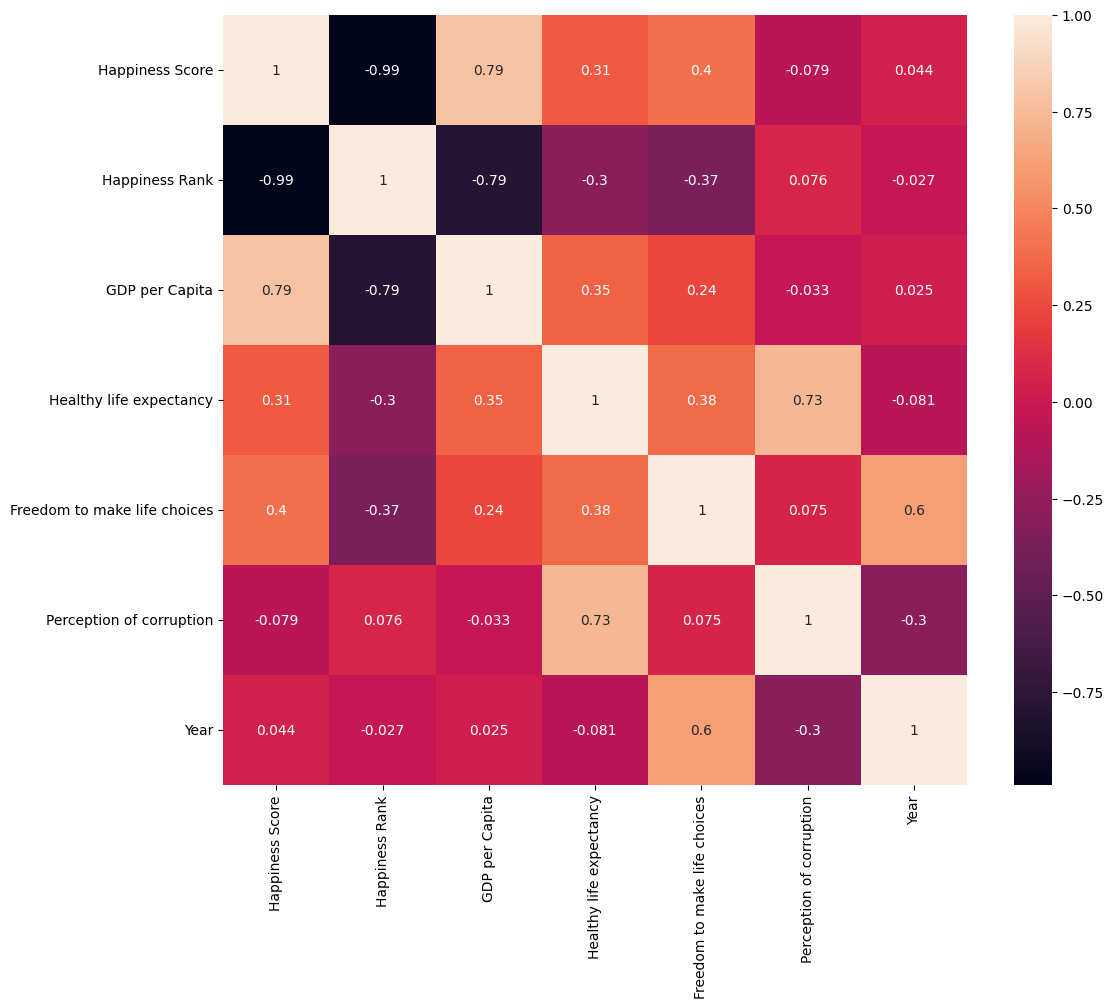

In [151]:
import seaborn as sn
plt.figure(figsize=(12, 10))
sn.heatmap(corr_matrix, annot=True)
plt.show()